(01-intro)=
# Preliminaries

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=brightgreen)
[![Source](https://img.shields.io/static/v1.svg?label=GitHub&message=Source&color=181717&logo=GitHub)](https://github.com/particle1331/ok-transformer/blob/master/docs/nb/mlops/01-intro.ipynb)
[![Stars](https://img.shields.io/github/stars/particle1331/ok-transformer?style=social)](https://github.com/particle1331/ok-transformer)

---

## Introduction

MLOps involves using a set of tools and best practices to deploy machine learning models into production environments, with a focus on maintaining their performance within specified service levels. Key considerations include maintainability, observability, monitoring, testing, reproducibility, and [CI/CD](https://about.gitlab.com/topics/ci-cd/#ci-cd-fundamentals) pipelines. Automated infrastructure provisioning is also crucial for scaling compute and memory requirements. To manage multiple iterations of our models, we need a framework for experiment tracking and model management. This provides a structured way of moving models in and out of production.

## Environment preparation

Rent a [t2.xlarge](https://instances.vantage.sh/aws/ec2/t2.xlarge) Ubuntu [EC2 instance](https://mlbookcamp.com/article/aws-ec2) with 30 GB storage in AWS on an IAM user. Refer to [this article](https://mlbookcamp.com/article/aws) on how to create an EC2 instance. We will connect to this instance via SSH and initiate a remote connection using VS Code. This gives us an IDE for development. It also provides a convenient way to transfer files from our local computer to the remote instance (i.e. drop local files to the file explorer of the remote instance) without having to use `scp` on the terminal. VS Code also supports **port forwarding** which allows us to easily access remote web interfaces using our local browser.

### SSH to the EC2 instance

Execute the following two lines in your local terminal. The first line [`chmod 400`](https://chmodcommand.com/chmod-400/) sets permission to **read-only** on the key pair file. The next line initiates the connection to the EC2 instance:

```bash
local:~$ chmod 400 t2xlarge.pem
local:~$ ssh -i "~/.ssh/t2xlarge.pem" ubuntu@<public-ip>
ubuntu@ip-<private-ip>:~$
```

**Remark.** Note that the public IPv4 address changes each time the instance is rebooted. See [this video](https://www.youtube.com/watch?v=4T6fk6UtpsE) on how to get static IP addresses. This is essential for long term instances. The SSH config for the instance can be configured accordingly after getting the Elastic IP:

```{margin}
`~/.ssh/config`
```
```text
Host t2xlarge
    HostName <public-ip>
    User ubuntu
    IdentityFile ~/.ssh/t2xlarge.pem
    StrictHostKeyChecking no
```

This allows easy connection with tab completion either:

```text
$ ssh <public-ip>
```

```text
$ ssh t2xlarge
```

**Remark.** You may need to [edit inbound traffic rules](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/authorizing-access-to-an-instance.html) if the instance will not connect.

### Installing Anaconda

Note that we cannot run code yet as there is nothing installed in this machine. We start by installing `conda` which comes with Python. Go to the Anaconda [downloads page](https://www.anaconda.com/products/distribution#Downloads) and copy the link for the Linux 64-bit x86 installer. The outputs are skipped for the sake of clarity:

```bash
~$ wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
~$ bash Anaconda3-2022.10-Linux-x86_64.sh  # Q > 'yes' > Enter
~$ source ~/.bashrc
(base) ~$
```

The first command will save a bash script which is executed in the next command. This installs Anaconda after agreeing to the terms of use and confirming the install location. Here `(base)` indicates that we are in the base `conda` environment:

```bash
(base) ~$ which python
/home/ubuntu/anaconda3/bin/python
```

### Installing Docker and Docker Compose

The last two commands allow us to run `docker` without `sudo`:

```bash
(base) ~$ sudo apt update
(base) ~$ sudo apt install docker.io
(base) ~$ sudo groupadd docker
(base) ~$ sudo usermod -aG docker $USER
```

Create a `soft` directory where we will install Docker Compose. To get the download link for this, we go to the [releases page](https://github.com/docker/compose/releases) of Docker Compose in GitHub. There we will find the release for Linux x86 in the Assets section. Copy the link and perform the following install:

```bash
(base) ~$ mkdir soft
(base) ~$ cd soft
(base) ~/soft$ wget https://github.com/docker/compose/releases/download/v2.15.0/docker-compose-linux-x86_64 -O docker-compose
(base) ~/soft$ chmod +x docker-compose
```

Note that `docker-compose` should be highlighted indicating that it is executable after [`chmod +x`](https://linuxtect.com/what-is-chmod-x-command-in-linux/):

```bash
(base) ~/soft$ ls
docker-compose
```

Next add the `soft` directory to the `PATH`. We can do this with `vim`:

```bash
vi ~/.bashrc
```

Then add the line `export PATH="${HOME}/soft:${PATH}"` at the end of the file. To apply this change, we run the command below. The last output tells us that `soft` has been added to the path:

```bash
(base) ~/soft$ source ~/.bashrc
(base) ~/soft$ cd ..
(base) ~$ which docker-compose
/home/ubuntu/soft/docker-compose
```

Now test if `docker` has been properly installed:

```bash
(base) ~$ docker run hello-world
```
```
Unable to find image 'hello-world:latest' locally
latest: Pulling from library/hello-world
[...]

Hello from Docker!
This message shows that your installation appears to be working correctly.
[...]

**Note:** If you get permission denied, you may have to exit and reconnect. 

### Remote SSH with VS Code

Creating a directory for our code:

```bash
(base) ~$ mkdir code
(base) ~$ cd code
(base) ~/code$ touch hello.py
```

We want to get access to the instance with VS Code, so we have an IDE to work with. Open a remote window by clicking the icon on lower left of the VS Code window. Click "Connect to Host" and select the instance name. Note that this requires the [Remote-SSH](https://marketplace.visualstudio.com/items?itemName=ms-VSCode-remote.remote-ssh) extension installed and editing the SSH config file located in `~/.ssh/config`. Opening the `code` folder:

```{figure} ../../img/ec2-vs-connected.png
---
width: 45em
---
```

Spinning up a Jupyter server:

```bash
(base) ~/code$ jupyter notebook
```

```
[...]
    To access the notebook, open this file in a browser:
        file:///home/ubuntu/.local/share/jupyter/runtime/nbserver-1713-open.html
    Or copy and paste one of these URLs:
        http://localhost:8888/?token=<jupytertoken>
     or http://127.0.0.1:8888/?token=<jupytertoken>
```

These URLs are not exposed to our local machine. To access these, we need to do **port forwarding**. We will use VS Code which makes this task trivial. Simply open the terminal in VS Code and click the PORTS tab. Here you will see the remote port and its corresponding local address.

```{figure} ../../img/ec2-vs-ports.png
---
width: 45em
---
```

The port on our local machine is `8889`, so we put the following URL in our browser:

```
http://localhost:8889/?token=<jupytertoken>
```

```{figure} ../../img/ec2-jupyter.png
---
width: 45em
---
```

**Remark.** You can work with Jupyter notebooks inside the remote VS Code assuming you have a powerful enough instance (e.g. `t2.xlarge`). Make sure to install the Python extensions in SSH not just locally. Kernels can be added from your conda envs following [this article](https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084).

(01-intro/modeling-ride-duration)=
## Modeling ride duration

In this section, we train a simple model for predicting ride duration from trip data. The [dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) that will be used consist of data obtained from street hail and dispatch taxi trips in New York City.

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

import warnings
from matplotlib_inline import backend_inline
from pandas.errors import SettingWithCopyWarning

backend_inline.set_matplotlib_formats('svg')
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

For precise definitions of these columns, we can check the [data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf). We will only use three features to model ride duration: `PULocationID`, `DOLocationID`, and `trip_distance`.

In [2]:
# !mkdir data
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet -O data/green_tripdata_2021-01.parquet
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet -O data/green_tripdata_2021-02.parquet

df = pd.read_parquet('./data/green_tripdata_2021-01.parquet', engine='fastparquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00


In [3]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [4]:
df.shape

(76518, 20)

### Computing ride duration

Since we are interested in duration, we have to subtract drop off datetime with pickup datetime. Duration by the second may be too granular, so we measure ride duration in minutes. Note that pick-up and drop-off datetimes are already of type `datetime64[ns]` so we can do the following operation:

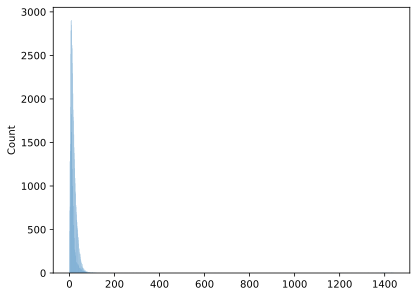

In [5]:
df['duration (min)'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.total_seconds() / 60
sns.histplot(df['duration (min)'].values);

In [6]:
df['duration (min)'].describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration (min), dtype: float64

Notice the longest trip took ~1400 minutes and there are trips which took <1 minute. We also see that 98% of all rides are within 1 hour. From a business perspective, it makes sense to predict durations that are at least one minute, and at most an hour. Checking the fraction of the dataset with duration that fall in this range:

In [7]:
((df['duration (min)'] >= 1) & (df['duration (min)'] <= 60)).mean()

0.9658903787344154

In [8]:
df = df[(df['duration (min)'] >= 1) & (df['duration (min)'] <= 60)]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration (min)
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,...,0.5,0.96,0.0,NaN,0.3,5.76,1.0,1.0,0.00,2.316667


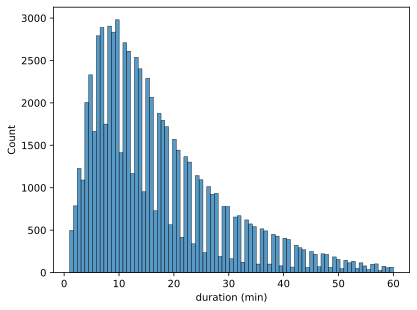

In [9]:
sns.histplot(df['duration (min)'].values)
plt.xlabel("duration (min)");

### Feature encoding

For the first iteration of the model, we choose only a few variables. In particular, we exclude datetime features which can be relevant. Is it a weekend, or a holiday? From experience, we know that these factors can have a large effect on ride duration. But for a first iteration, we only choose the following three features:

In [10]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Convert to string, sklearn requirement
df[categorical] = df[categorical].astype(str)

To encode categorical features, we use [`DictVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html). This performs one-hot encoding of categorical features while the numerical features are simply passed. Consider a dataset with categorical features `f1` with unique values `[a, b, c]` and `f2` with unique values `[d, e]`, and a numerical feature `t`. The transformed dataset gets features `[f1=a, f1=b, f1=c, f2=d, f2=e, t]`. For example, `{f1: a, f2: e, t: 1.3}` is transformed to `[1, 0, 0, 0, 1, 1.3]`. One nice thing about this is that this will not fail with new categories (i.e. these are simply mapped to all zeros).

In [11]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
dv.fit_transform(train_dicts)

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [12]:
dv.fit_transform(train_dicts).todense().shape[1] == df.PULocationID.nunique() + df.DOLocationID.nunique() + 1

True

Each trip is represented by a dictionary containing three features:

In [13]:
train_dicts[:3]

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12}]

The location IDs are one-hot encoded and the dataset is converted to a sparse matrix:

In [14]:
dv.transform(train_dicts[:3]).todense()

matrix([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.53],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.12]])

### Baseline model

In this section, we will train a linear regression model. Note that the validation set consists of data one month after the training set. We will define a sequence of transformations that will be applied to the dataset to get the model features. Note that the model is trained and evaluated only on rides that fall between 1 to 60 minutes.

In [15]:
def filter_ride_duration(df):
    # Create target column and filter outliers
    df['duration (min)'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime   # seconds
    df['duration (min)'] = df['duration (min)'].dt.total_seconds() / 60
    return df[(df['duration (min)'] >= 1) & (df['duration (min)'] <= 60)]

def convert_to_dict(df, features):
    # Convert dataframe to feature dicts
    return df[features].to_dict(orient='records')

def preprocess(df, cat, num):
    df = filter_ride_duration(df)
    df[cat] = df[cat].astype(str)
    df[num] = df[num].astype(float)
    return df

Note that the above preprocessing steps apply to all datasets (i.e. no concern of data leak). In the following, observe that the vectorizer only sees the training data: 

In [16]:
# Load data
df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df_valid = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# Preprocessing
cat = ['PULocationID', 'DOLocationID']
num = ['trip_distance']

df_train = preprocess(df_train, cat=cat, num=num)
df_valid = preprocess(df_valid, cat=cat, num=num)

# Preparing features
features = ['PULocationID', 'DOLocationID', 'trip_distance']
D_train = convert_to_dict(df_train, features=features)
D_valid = convert_to_dict(df_valid, features=features)
y_train = df_train['duration (min)']
y_valid = df_valid['duration (min)']

# Fit all known categories
dv = DictVectorizer()
dv.fit(D_train)
X_train = dv.transform(D_train)
X_valid = dv.transform(D_valid)

Training a linear model:

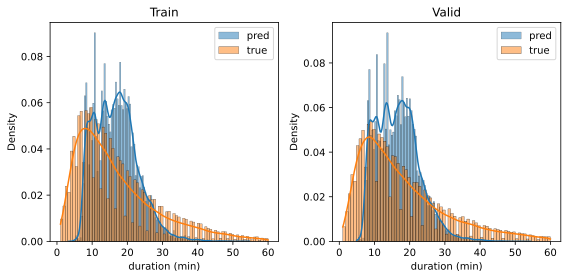

In [17]:
def plot_duration_histograms(y_train, p_train, y_valid, p_valid):
    """Plot true and prediction distributions of ride duration."""
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    sns.histplot(p_train, ax=ax[0], label='pred', color='C0', stat='density', kde=True)
    sns.histplot(y_train, ax=ax[0], label='true', color='C1', stat='density', kde=True)
    ax[0].set_title("Train")
    ax[0].legend()

    sns.histplot(p_valid, ax=ax[1], label='pred', color='C0', stat='density', kde=True)
    sns.histplot(y_valid, ax=ax[1], label='true', color='C1', stat='density', kde=True)
    ax[1].set_title("Valid")
    ax[1].legend()

    fig.tight_layout();


lr = LinearRegression()
lr.fit(X_train, y_train)

p_train = lr.predict(X_train)
p_valid = lr.predict(X_valid)
plot_duration_histograms(y_train, p_train, y_valid, p_valid)

In [18]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid), squared=False))

RMSE (train): 9.838799799829626
RMSE (valid): 10.499110710362512


(00-using-interaction-features)=
### Using interaction features

Instead of learning separate weights for the pickup and drop off locations, we consider learning weights for combinations of pickup and drop off locations. Note we can also add pick up point as additional feature since we know from experience that directionality can be important.

In [19]:
def add_location_interaction(df):
    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
    return df

# Load data
df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df_valid = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# Preprocessing
cat = ['PULocationID', 'DOLocationID']
num = ['trip_distance']
df_train = preprocess(df_train, cat=cat, num=num)
df_valid = preprocess(df_valid, cat=cat, num=num)

# Preparing features
df_train = add_location_interaction(df_train)
df_valid = add_location_interaction(df_valid)

features = ['PU_DO', 'trip_distance']
D_train = convert_to_dict(df_train, features=features)
D_valid = convert_to_dict(df_valid, features=features)
y_train = df_train['duration (min)']
y_valid = df_valid['duration (min)']

# Fit all known categories
dv = DictVectorizer()
dv.fit(D_train)
X_train = dv.transform(D_train)
X_valid = dv.transform(D_valid)

Using the same model:

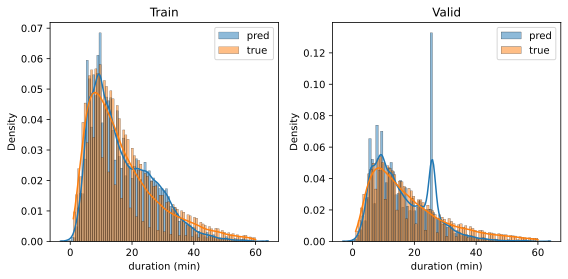

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

p_train = lr.predict(X_train)
p_valid = lr.predict(X_valid)
plot_duration_histograms(y_train, p_train, y_valid, p_valid)

In [21]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid), squared=False))

RMSE (train): 5.699564118198945
RMSE (valid): 7.758715206931833


### Persisting the model

In [22]:
with open('models/lin_reg.bin', 'wb') as fout:
    pickle.dump((dv, lr), fout)

(00-pipenv-virtual-env)=
## Pipenv virtual environments

Pipenv is a production grade virtual environment and dependency manager for getting deterministic builds. The following creates a [Pipenv](https://pipenv.pypa.io/en/latest/) virtual environment mapped to the current directory that uses Python 3.9:

```
$ cd project/root/dir
$ pipenv --python 3.9
```

This should generate a `Pipfile` which supersedes the usual requirements file and also a `Pipfile.lock` containing hashes of installed packages ensuring deterministic builds. Generally, we keep these two files under version control. 

Commands can then be run after activating the shell with `pipenv shell`. Or by using `pipenv run <command>`. Other options can be viewed using `-h`:

In [23]:
!pipenv --help

Usage: pipenv [OPTIONS] COMMAND [ARGS]...

Options:
  --where                         Output project home information.
  --venv                          Output virtualenv information.
  --py                            Output Python interpreter information.
  --envs                          Output Environment Variable options.
  --rm                            Remove the virtualenv.
  --bare                          Minimal output.
  --man                           Display manpage.
  --support                       Output diagnostic information for use in
                                  GitHub issues.
  --site-packages / --no-site-packages
                                  Enable site-packages for the virtualenv.
                                  [env var: PIPENV_SITE_PACKAGES]
  --python TEXT                   Specify which version of Python virtualenv
                                  should use.
  --clear                         Clears caches (pipenv, pip).  [env var:
             

### Installing dependencies

Every install automatically updates the `Pipfile`:

```bash
pipenv install "scikit-learn>=1.0.0"
```

Development dependencies can be installed using:

```bash
pipenv install --dev requests
```

Our `Pipfile` should now look as follows:

```ini
[[source]]
url = "https://pypi.org/simple"
verify_ssl = true
name = "pypi"

[packages]
scikit-learn = ">=1.0.0"

[dev-packages]
requests = "*"

[requires]
python_version = "3.9"
```

### Pipenv with Docker

The following Dockerfile shows how to use pipenv to manage dependencies in a Python container. This first install pipenv in the system environment, and then install all contents of the Pipfile on the system environment. Finally, the main program is run:

```Dockerfile
FROM python:3.9.15-slim

RUN pip install -U pip
RUN pip install pipenv

COPY ["Pipfile", "Pipfile.lock", "main.py", "./"]
RUN pipenv install --system --deploy

CMD ["python", "main.py"]
```

**Remark.** System installs are generally avoided. But okay within (isolated) containers. Here `--deploy` means that the build will fail if the lock file is out-of-date. This is a nice feature for a production application. 

## MLOps maturity model

The following provides a way of measuring the maturity of machine learning production environments as well as provide a guideline for continuous improvement of production systems and workflows.

```{margin}
[MLOps maturity model](https://docs.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-maturity-model)
```
```{figure} ../../img/mlops-maturity.png
---
width: 45.4em
---
```

## Appendix: AWS CLI & Boto3

AWS offers a CLI which allows working with their services through a terminal. The following assumes that the CLI has been configured with your AWS access key ID and secret access key. This can be done by running `aws configure` in the terminal. Checking the version:

In [24]:
!aws --version

aws-cli/2.7.5 Python/3.9.11 Darwin/21.6.0 exe/x86_64 prompt/off


### S3

Creating an S3 bucket:

In [25]:
!aws s3api create-bucket --bucket test-bucket-3003 --region us-east-1

{
    "Location": "/test-bucket-3003"
}


Listing all S3 buckets:

In [26]:
!aws s3 ls

2023-05-18 01:41:14 test-bucket-3003


Same command with the Python SDK https://github.com/boto/boto3:

In [27]:
import boto3

s3 = boto3.client('s3')

response = s3.list_buckets()
for bucket in response['Buckets']:
    print(bucket['Name'])

test-bucket-3003


Deleting the test S3 bucket:

In [28]:
response = s3.delete_bucket(Bucket='test-bucket-3003')
response['ResponseMetadata']['HTTPStatusCode']

204

In [58]:
s3.list_buckets()['Buckets'] == []

True

**Remark.** Both the `aws-cli` and `boto3` have extensive documentation for all AWS services.

### JSON processing

Responses of AWS CLI are typically deeply nested JSON. See [this reference](https://www.baeldung.com/linux/jq-command-json) on the basics of [`jq`](https://stedolan.github.io/jq/). The following example processes an event in a [Kinesis stream](https://aws.amazon.com/kinesis/) to obtain and decode the data:

```bash
$ echo '{
    "Records": [
        {
            "kinesis": {
                "kinesisSchemaVersion": "1.0",
                "partitionKey": "1",
                "sequenceNumber": "49630706038424016596026506533782471779140474214180454402",
                "data": "eyAgICAgICAgICAicmlkZSI6IHsgICAgICAgICAgICAgICJQVUxvY2F0aW9uSUQiOiAxMzAsICAgICAgICAgICAgICAiRE9Mb2NhdGlvbklEIjogMjA1LCAgICAgICAgICAgICAgInRyaXBfZGlzdGFuY2UiOiAzLjY2ICAgICAgICAgIH0sICAgICAgICAgICJyaWRlX2lkIjogMTIzICAgICAgfQ==",
                "approximateArrivalTimestamp": 1655944485.718
            },
            "eventSource": "aws:kinesis",
            "eventVersion": "1.0",
            "eventID": "shardId-000000000000:49630706038424016596026506533782471779140474214180454402",
            "eventName": "aws:kinesis:record",
            "invokeIdentityArn": "arn:aws:iam::241297376613:role/lambda-kinesis-role",
            "awsRegion": "us-east-1",
            "eventSourceARN": "arn:aws:kinesis:us-east-1:241297376613:stream/ride_events"
        }
    ]
}' | jq -r '.Records[].kinesis.data' | base64 --decode | jq
```

In [57]:
!echo '{ \
    "Records": [ \
        { \
            "kinesis": { \
                "kinesisSchemaVersion": "1.0", \
                "partitionKey": "1", \
                "sequenceNumber": "49630706038424016596026506533782471779140474214180454402", \
                "data": "eyAgICAgICAgICAicmlkZSI6IHsgICAgICAgICAgICAgICJQVUxvY2F0aW9uSUQiOiAxMzAsICAgICAgICAgICAgICAiRE9Mb2NhdGlvbklEIjogMjA1LCAgICAgICAgICAgICAgInRyaXBfZGlzdGFuY2UiOiAzLjY2ICAgICAgICAgIH0sICAgICAgICAgICJyaWRlX2lkIjogMTIzICAgICAgfQ==", \
                "approximateArrivalTimestamp": 1655944485.718 \
            }, \
            "eventSource": "aws:kinesis", \
            "eventVersion": "1.0", \
            "eventID": "shardId-000000000000:49630706038424016596026506533782471779140474214180454402", \
            "eventName": "aws:kinesis:record", \
            "invokeIdentityArn": "arn:aws:iam::241297376613:role/lambda-kinesis-role", \
            "awsRegion": "us-east-1", \
            "eventSourceARN": "arn:aws:kinesis:us-east-1:241297376613:stream/ride_events" \
        } \
    ] \
}' | jq -r '.Records[].kinesis.data' | base64 --decode | jq

{
  "ride": {
    "PULocationID": 130,
    "DOLocationID": 205,
    "trip_distance": 3.66
  },
  "ride_id": 123
}
